# Ouput Result Evaluation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

## Prepare Data

In [8]:
# Constants from the paper
HOLDING_COST_RATE = 0.01  # 1% of unit price
LOST_SALE_COST_RATE = 0.125  # 12.5% of unit price
ORDER_COST_FIXED = 0.5  # fixed $0.5 per order
UNIT_PRICE = 1.0  # assume normalized price for analysis; update as needed

In [25]:
def get_file_names():
    current_file = os.path.abspath("__file__")
    code_dir = os.path.dirname(current_file)
    data_dir = os.path.join(os.path.dirname(code_dir), "evaluation_output")
    # List all files in the directory
    file_names = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    print("------------------- File names retrieved successfully -------------------\n")
    return file_names, data_dir

In [26]:
def get_filepath(data_dir, file):
    filepath = os.path.join(data_dir, file)
    print(f"Loaded: {file}")
    return filepath

In [29]:
def extract_efficiency_data(filepath):
    df = pd.read_csv(filepath, skiprows=3, sep=r"\s{2,}", engine='python', header=None, names=["metric", "value"])
    model = open(filepath).readline().strip()
    sku = open(filepath).readlines()[1].strip()

    mean_inventory = float(df[df["metric"] == "mean_inventory"]["value"].values[0])
    lost_sales = float(df[df["metric"] == "lost_sales"]["value"].values[0])
    num_orders = float(df[df["metric"] == "count_orders"]["value"].values[0])
    realized_service_level = float(df[df["metric"] == "service_level"]["value"].values[0])

    holding_cost = mean_inventory * UNIT_PRICE * HOLDING_COST_RATE
    lost_sales_cost = lost_sales * UNIT_PRICE * LOST_SALE_COST_RATE
    ordering_cost = num_orders * ORDER_COST_FIXED
    total_cost = holding_cost + lost_sales_cost + ordering_cost

    tsl_match = re.search(r"tsl_(\d+\.\d+)", os.path.basename(filepath)) 
    tsl = float(tsl_match.group(1)) if tsl_match else None
    
    return {
        "model": model,
        "sku": sku,
        "mean_inventory": mean_inventory,
        "lost_sales": lost_sales,
        "num_orders": num_orders,
        "holding_cost": holding_cost,
        "lost_sales_cost": lost_sales_cost,
        "ordering_cost": ordering_cost,
        "total_cost": total_cost,
        "tsl": tsl,
        "realized_service_level": realized_service_level
    }

In [65]:
file_names, data_dir = get_file_names()
all_metrics = []

for file in file_names:
    filepath = get_filepath(data_dir, file)
    metrics = extract_efficiency_data(filepath)
    # print(metrics)
    all_metrics.append(metrics)

df = pd.DataFrame(all_metrics)
df

------------------- File names retrieved successfully -------------------

Loaded: LGBM_HOBBIES_1_234_tsl_0.9.txt
Loaded: ARIMA_HOBBIES_1_234_tsl_0.95.txt
Loaded: LGBM_HOUSEHOLD_1_118_tsl_0.95.txt
Loaded: LGBM_FOODS_3_819_tsl_0.99.txt
Loaded: ARIMA_FOODS_3_819_tsl_0.99.txt
Loaded: LGBM_HOUSEHOLD_1_118_tsl_0.9.txt
Loaded: ARIMA_FOODS_3_819_tsl_0.9.txt
Loaded: ARIMA_FOODS_3_090_tsl_0.99.txt
Loaded: LGBM_FOODS_3_819_tsl_0.9.txt
Loaded: LGBM_FOODS_3_090_tsl_0.99.txt
Loaded: ARIMA_HOUSEHOLD_1_118_tsl_0.95.txt
Loaded: LGBM_HOBBIES_1_234_tsl_0.99.txt
Loaded: LGBM_FOODS_3_090_tsl_0.9.txt
Loaded: ARIMA_HOUSEHOLD_1_118_tsl_0.9.txt
Loaded: ARIMA_FOODS_3_090_tsl_0.9.txt
Loaded: ARIMA_HOBBIES_1_234_tsl_0.9.txt
Loaded: ARIMA_HOUSEHOLD_1_118_tsl_0.99.txt
Loaded: LGBM_HOBBIES_1_234_tsl_0.95.txt
Loaded: ARIMA_FOODS_3_090_tsl_0.95.txt
Loaded: LGBM_FOODS_3_090_tsl_0.95.txt
Loaded: LGBM_FOODS_3_819_tsl_0.95.txt
Loaded: ARIMA_FOODS_3_819_tsl_0.95.txt
Loaded: LGBM_HOUSEHOLD_1_118_tsl_0.99.txt
Loaded: ARIMA_

,model,sku,mean_inventory,lost_sales,num_orders,holding_cost,lost_sales_cost,ordering_cost,total_cost,tsl,realized_service_level
0,LGBM,HOBBIES_1_234,72.664481,224.279014,51.0,0.726645,28.034877,25.5,54.261522,0.90,0.949682
1,ARIMA,HOBBIES_1_234,85.244419,10.934831,53.0,0.852444,1.366854,26.5,28.719298,0.95,0.997189
2,LGBM,HOUSEHOLD_1_118,117.917279,0.000000,53.0,1.179173,0.000000,26.5,27.679173,0.95,1.000000
3,LGBM,FOODS_3_819,37.985767,0.000000,52.0,0.379858,0.000000,26.0,26.379858,0.99,1.000000
4,ARIMA,FOODS_3_819,38.488359,0.000000,50.0,0.384884,0.000000,25.0,25.384884,0.99,1.000000
5,LGBM,HOUSEHOLD_1_118,106.258403,0.000000,53.0,1.062584,0.000000,26.5,27.562584,0.90,1.000000
6,ARIMA,FOODS_3_819,24.644547,0.000000,50.0,0.246445,0.000000,25.0,25.246445,0.90,1.000000
7,ARIMA,FOODS_3_090,1847.135565,1327.472678,48.0,18.471356,165.934085,24.0,208.405440,0.99,0.981141
8,LGBM,FOODS_3_819,24.115409,0.000000,52.0,0.241154,0.000000,26.0,26.241154,0.90,1.000000
9,LGBM,FOODS_3_090,1733.678762,2673.764710,46.0,17.336788,334.220589,23.0,374.557376,0.99,0.951924


## Plots

### Efficiency Curve

##### ABS

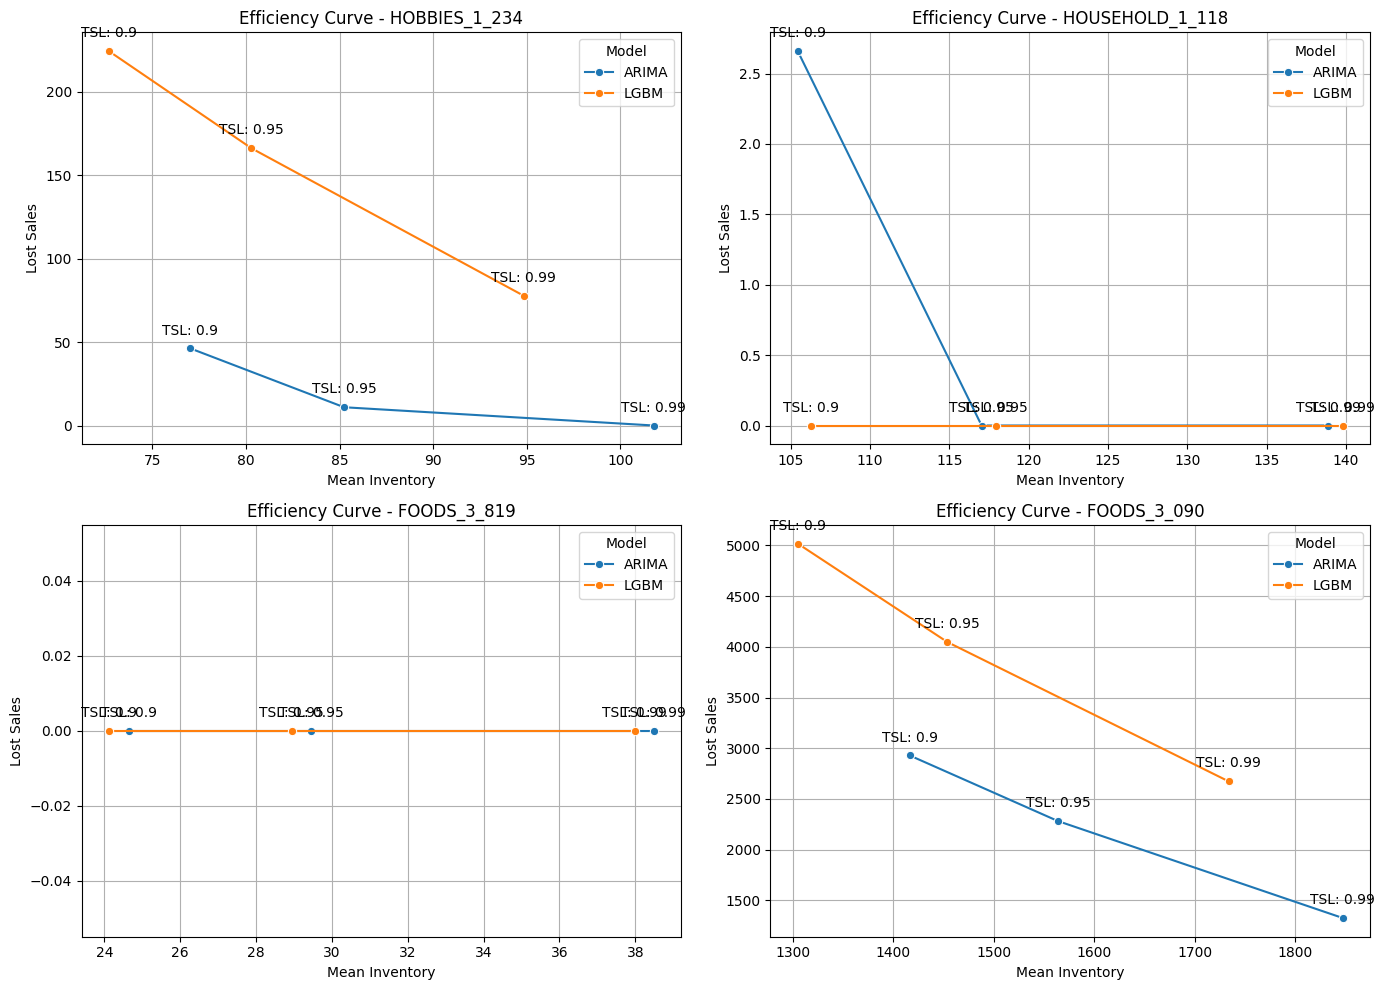

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent palette
palette = {"ARIMA": "#1f77b4", "LGBM": "#ff7f0e"}  # Blue for ARIMA, Orange for LGBM
order = ["ARIMA", "LGBM"]  # Enforced plotting order

# List of unique SKUs
unique_skus = df["sku"].unique()
num_skus = len(unique_skus)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns
axes = axes.flatten()

for i, sku in enumerate(unique_skus):
    ax = axes[i]
    subset = df[df["sku"] == sku]
    
    # Plot with fixed hue order and color palette
    sns.lineplot(data=subset, x="mean_inventory", y="lost_sales",
                 hue="model", hue_order=order, palette=palette,
                 marker="o", ax=ax)

    ax.set_title(f"Efficiency Curve - {sku}")
    ax.set_xlabel("Mean Inventory")
    ax.set_ylabel("Lost Sales")
    ax.grid(True)

    # Force legend order
    handles, labels = ax.get_legend_handles_labels()
    legend_order = [labels.index(m) for m in order if m in labels]
    ax.legend([handles[j] for j in legend_order],
              [labels[j] for j in legend_order], title="Model")

    # Add TSL annotations
    for _, row in subset.iterrows():
        ax.annotate(f"TSL: {row['tsl']}", (row["mean_inventory"], row["lost_sales"]),
                    textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

##### Scaled

In [56]:
import math
df["scaled_inventory"] = df["mean_inventory"] / df["avg_sales"]
df["scaled_lost_sales"] = df["lost_sales"] / df["avg_sales"]

unique_skus = df["sku"].unique()
n_skus = len(unique_skus)
n_cols = 2
n_rows = math.ceil(n_skus / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for idx, sku in enumerate(unique_skus):
    ax = axes[idx]

    subset = df[df["sku"] == sku]
    sns.lineplot(data=subset, x="scaled_inventory", y="scaled_lost_sales", hue="model", marker="o", ax=ax)
    ax.set_title(f"Scaled Efficiency Curve - {sku}")
    ax.set_xlabel("Scaled Mean Inventory")
    ax.set_ylabel("Scaled Lost Sales")
    ax.grid(True)
    ax.legend(title="Model", loc="best")

    for _, row in subset.iterrows():
        ax.annotate(f"TSL: {row['tsl']}", (row["scaled_inventory"], row["scaled_lost_sales"]),
                    textcoords="offset points", xytext=(0, 6), ha='center', fontsize=8)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

KeyError: 'avg_sales'

### RSL v. TSL

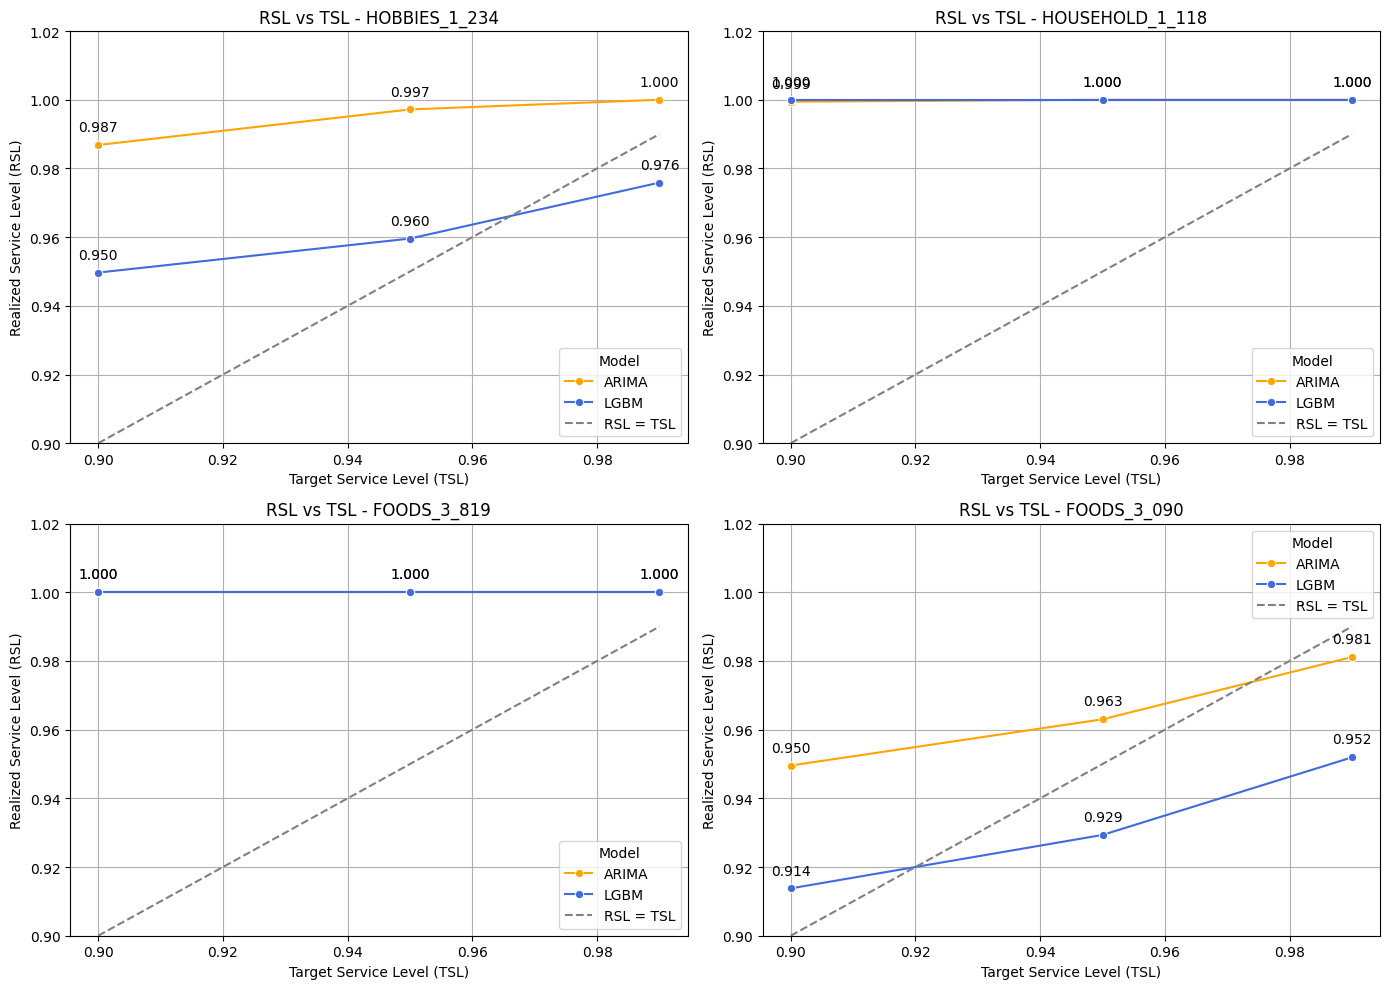

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique SKUs
unique_skus = df["sku"].unique()

# Define consistent model order and colors
model_order = ["ARIMA", "LGBM"]
palette = {"ARIMA": "orange", "LGBM": "royalblue"}

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, sku in enumerate(unique_skus):
    ax = axes[i]
    subset = df[df["sku"] == sku].sort_values(by="tsl")

    # Plot forecast lines
    sns.lineplot(data=subset, x="tsl", y="realized_service_level",
                 hue="model", hue_order=model_order,
                 palette=palette, marker="o", ax=ax)

    # Add diagonal reference line: RSL = TSL
    ax.plot(subset["tsl"], subset["tsl"], linestyle="--", color="gray", label="RSL = TSL")

    # Title & labels
    ax.set_title(f"RSL vs TSL - {sku}")
    ax.set_xlabel("Target Service Level (TSL)")
    ax.set_ylabel("Realized Service Level (RSL)")
    ax.set_ylim(0.9, 1.02)
    ax.grid(True)

    # Add annotations for RSL values
    for _, row in subset.iterrows():
        ax.annotate(f"{row['realized_service_level']:.3f}",
                    (row["tsl"], row["realized_service_level"]),
                    textcoords="offset points", xytext=(0, 10), ha='center')

    # Handle legend manually to avoid duplicate "RSL = TSL"
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys(), title="Model")

plt.tight_layout()
plt.show()

#### FOODS_3_090

In [41]:
df[df['sku'] == 'FOODS_3_090']

,model,sku,mean_inventory,lost_sales,num_orders,holding_cost,lost_sales_cost,ordering_cost,total_cost,tsl,realized_service_level
7,ARIMA,FOODS_3_090,1847.135565,1327.472678,48.0,18.471356,165.934085,24.0,208.405440,0.99,0.981141
9,LGBM,FOODS_3_090,1733.678762,2673.764710,46.0,17.336788,334.220589,23.0,374.557376,0.99,0.951924
12,LGBM,FOODS_3_090,1305.182546,5016.904122,46.0,13.051825,627.113015,23.0,663.164841,0.90,0.913779
14,ARIMA,FOODS_3_090,1416.423093,2929.472840,48.0,14.164231,366.184105,24.0,404.348336,0.90,0.949559
18,ARIMA,FOODS_3_090,1563.883212,2282.794395,48.0,15.638832,285.349299,24.0,324.988131,0.95,0.963012
19,LGBM,FOODS_3_090,1454.077647,4046.054391,46.0,14.540776,505.756799,23.0,543.297575,0.95,0.929344


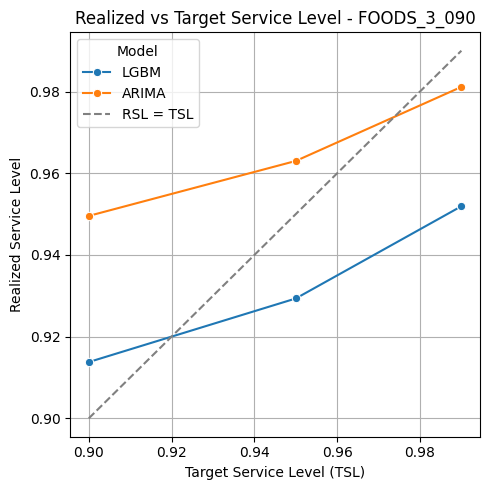

In [ ]:
# FOODS_3_090
plt.figure(figsize=(5, 5))
subset = df[df["sku"] == "FOODS_3_090"].sort_values("tsl")
sns.lineplot(data=subset, x="tsl", y="realized_service_level", hue="model", marker="o")
plt.plot(subset["tsl"], subset["tsl"], linestyle='--', color='gray', label='RSL = TSL')


plt.title(f"Realized vs Target Service Level - {sku}")
plt.xlabel("Target Service Level (TSL)")
plt.ylabel("Realized Service Level")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()


#### FOODS_3_819

In [42]:
df[df['sku'] == 'FOODS_3_819']

,model,sku,mean_inventory,lost_sales,num_orders,holding_cost,lost_sales_cost,ordering_cost,total_cost,tsl,realized_service_level
3,LGBM,FOODS_3_819,37.985767,0.0,52.0,0.379858,0.0,26.0,26.379858,0.99,1.0
4,ARIMA,FOODS_3_819,38.488359,0.0,50.0,0.384884,0.0,25.0,25.384884,0.99,1.0
6,ARIMA,FOODS_3_819,24.644547,0.0,50.0,0.246445,0.0,25.0,25.246445,0.90,1.0
8,LGBM,FOODS_3_819,24.115409,0.0,52.0,0.241154,0.0,26.0,26.241154,0.90,1.0
20,LGBM,FOODS_3_819,28.938483,0.0,52.0,0.289385,0.0,26.0,26.289385,0.95,1.0
21,ARIMA,FOODS_3_819,29.458390,0.0,50.0,0.294584,0.0,25.0,25.294584,0.95,1.0


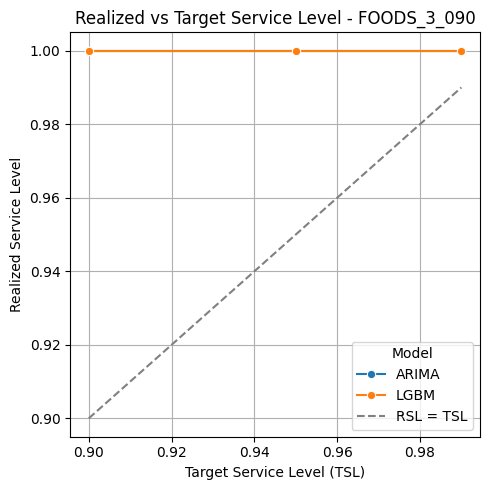

In [43]:
# FOODS_3_819
plt.figure(figsize=(5, 5))
subset = df[df["sku"] == "FOODS_3_819"].sort_values("tsl")
sns.lineplot(data=subset, x="tsl", y="realized_service_level", hue="model", marker="o")
plt.plot(subset["tsl"], subset["tsl"], linestyle='--', color='gray', label='RSL = TSL')


plt.title(f"Realized vs Target Service Level - {sku}")
plt.xlabel("Target Service Level (TSL)")
plt.ylabel("Realized Service Level")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

#### HOBBIES_1_234

In [44]:
df[df['sku'] == 'HOBBIES_1_234']

,model,sku,mean_inventory,lost_sales,num_orders,holding_cost,lost_sales_cost,ordering_cost,total_cost,tsl,realized_service_level
0,LGBM,HOBBIES_1_234,72.664481,224.279014,51.0,0.726645,28.034877,25.5,54.261522,0.90,0.949682
1,ARIMA,HOBBIES_1_234,85.244419,10.934831,53.0,0.852444,1.366854,26.5,28.719298,0.95,0.997189
11,LGBM,HOBBIES_1_234,94.843453,77.730369,51.0,0.948435,9.716296,25.5,36.164731,0.99,0.975879
15,ARIMA,HOBBIES_1_234,77.021985,46.181118,53.0,0.770220,5.772640,26.5,33.042860,0.90,0.986833
17,LGBM,HOBBIES_1_234,80.285641,166.095891,51.0,0.802856,20.761986,25.5,47.064843,0.95,0.959585
23,ARIMA,HOBBIES_1_234,101.799149,0.000000,53.0,1.017991,0.000000,26.5,27.517991,0.99,1.000000


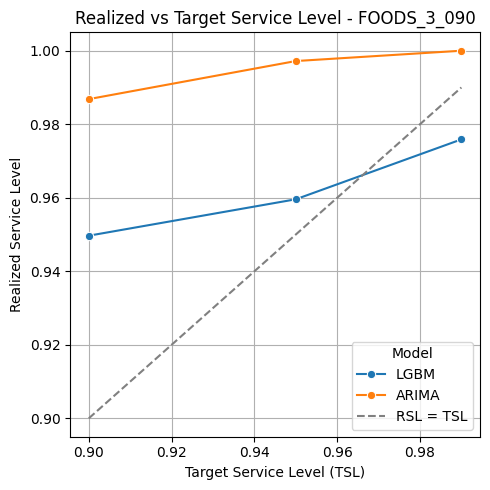

In [45]:
# HOBBIES_1_234
plt.figure(figsize=(5, 5))
subset = df[df["sku"] == "HOBBIES_1_234"].sort_values("tsl")
sns.lineplot(data=subset, x="tsl", y="realized_service_level", hue="model", marker="o")
plt.plot(subset["tsl"], subset["tsl"], linestyle='--', color='gray', label='RSL = TSL')


plt.title(f"Realized vs Target Service Level - {sku}")
plt.xlabel("Target Service Level (TSL)")
plt.ylabel("Realized Service Level")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

#### HOUSEHOLD_1_118

In [46]:
df[df['sku'] == 'HOUSEHOLD_1_118']

,model,sku,mean_inventory,lost_sales,num_orders,holding_cost,lost_sales_cost,ordering_cost,total_cost,tsl,realized_service_level
2,LGBM,HOUSEHOLD_1_118,117.917279,0.000000,53.0,1.179173,0.000000,26.5,27.679173,0.95,1.000000
5,LGBM,HOUSEHOLD_1_118,106.258403,0.000000,53.0,1.062584,0.000000,26.5,27.562584,0.90,1.000000
10,ARIMA,HOUSEHOLD_1_118,117.033529,0.000000,53.0,1.170335,0.000000,26.5,27.670335,0.95,1.000000
13,ARIMA,HOUSEHOLD_1_118,105.446702,2.659901,53.0,1.054467,0.332488,26.5,27.886955,0.90,0.999438
16,ARIMA,HOUSEHOLD_1_118,138.864177,0.000000,53.0,1.388642,0.000000,26.5,27.888642,0.99,1.000000
22,LGBM,HOUSEHOLD_1_118,139.787390,0.000000,53.0,1.397874,0.000000,26.5,27.897874,0.99,1.000000


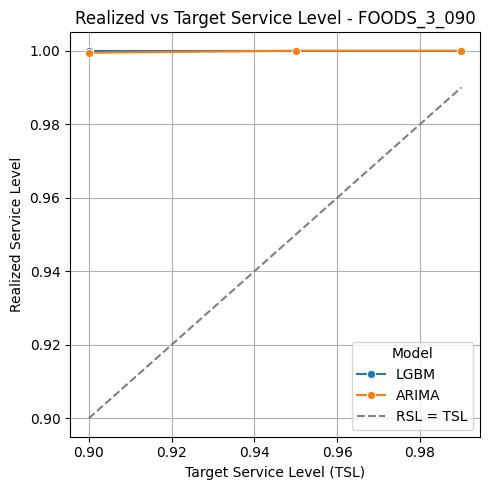

In [47]:
# HOUSEHOLD_1_118
plt.figure(figsize=(5, 5))
subset = df[df["sku"] == "HOUSEHOLD_1_118"].sort_values("tsl")
sns.lineplot(data=subset, x="tsl", y="realized_service_level", hue="model", marker="o")
plt.plot(subset["tsl"], subset["tsl"], linestyle='--', color='gray', label='RSL = TSL')


plt.title(f"Realized vs Target Service Level - {sku}")
plt.xlabel("Target Service Level (TSL)")
plt.ylabel("Realized Service Level")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Model")
plt.show()

### Financial Cost Curve: Total Cost vs TSL
    

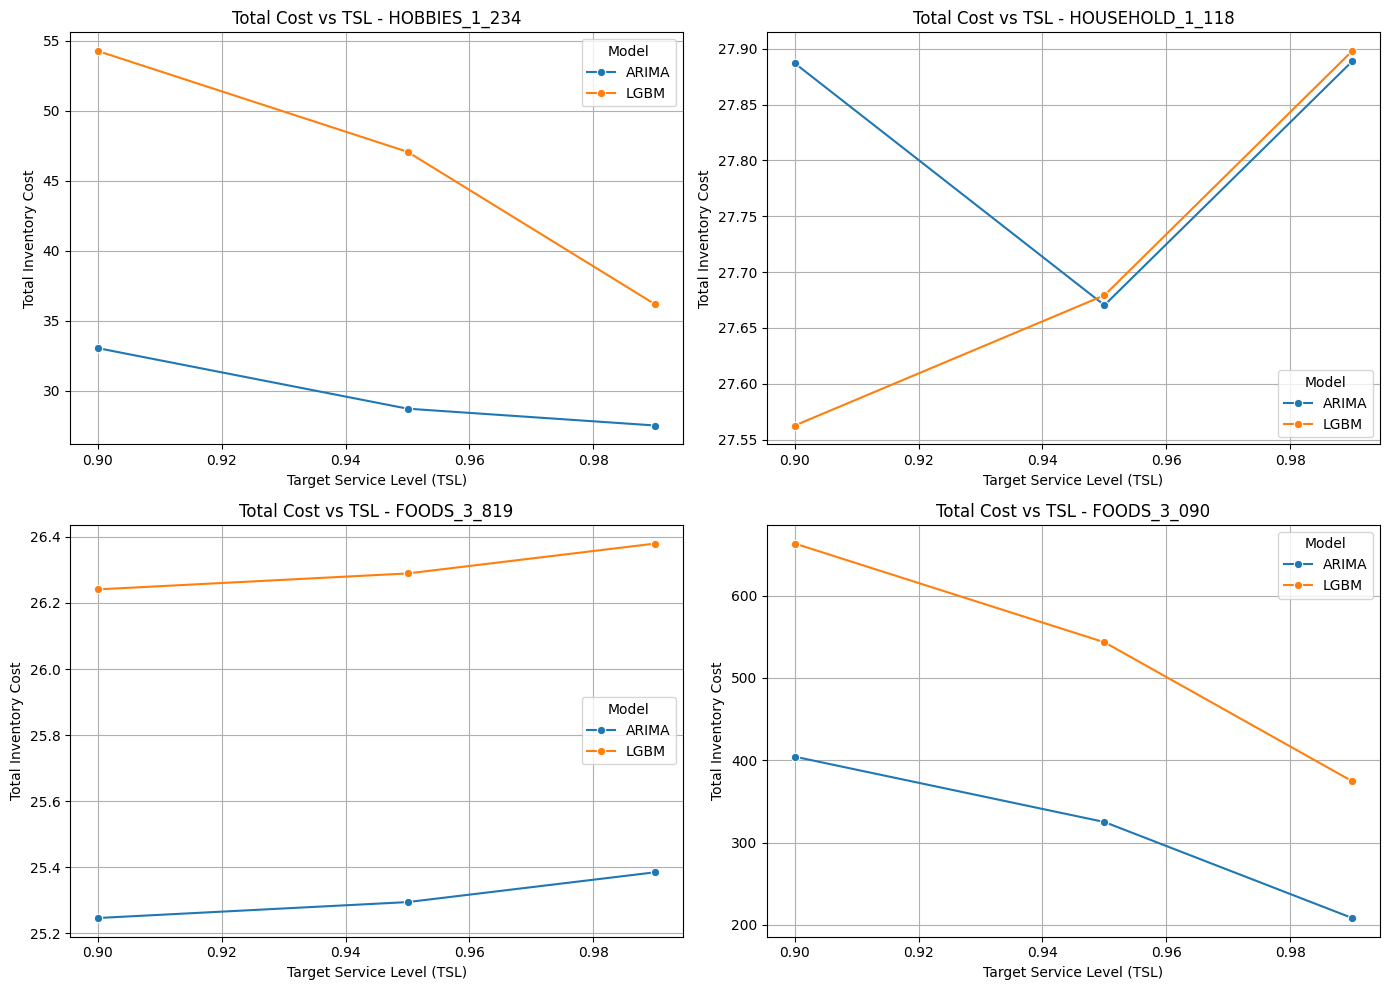

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set consistent palette and model order
palette = {"ARIMA": "#1f77b4", "LGBM": "#ff7f0e"}  # ARIMA: blue, LGBM: orange
model_order = ["ARIMA", "LGBM"]

# Unique SKUs
unique_skus = df["sku"].unique()
n_skus = len(unique_skus)
n_cols = 2
n_rows = math.ceil(n_skus / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for idx, sku in enumerate(unique_skus):
    ax = axes[idx]
    subset = df[df["sku"] == sku].sort_values("tsl")

    sns.lineplot(data=subset, x="tsl", y="total_cost",
                 hue="model", hue_order=model_order, palette=palette,
                 marker="o", ax=ax)

    ax.set_title(f"Total Cost vs TSL - {sku}")
    ax.set_xlabel("Target Service Level (TSL)")
    ax.set_ylabel("Total Inventory Cost")
    ax.grid(True)

    # Reorder legend to enforce consistency
    handles, labels = ax.get_legend_handles_labels()
    legend_order = [labels.index(m) for m in model_order if m in labels]
    ax.legend([handles[i] for i in legend_order],
              [labels[i] for i in legend_order], title="Model")

# Hide unused axes if fewer than n_rows * n_cols
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()